# Exploratory Data Analysis (EDA)

## Block 1: Loading and Overview of the Dataset (20%)

This step focuses on loading the raw datasets and performing an initial inspection to understand the structure, column names, and data types. The goal is to identify immediate issues such as inconsistent column names, incorrect data types, or obvious missing values that could affect further analysis.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import googlemaps
import os
from dotenv import load_dotenv

The following code loads all raw data files and combines them into a single dataframe. A column for 'route' was added to each individual dataframe to distinguish them. 

Some inconsistencies in column names were found in the raw data files, which was fixed before merging. 

We will then save it as a single csv file for faster loading and comment out the code that loads the individual files to save time as this process takes a few minutes. 

In [4]:
# # Step 1: Load the raw datasets

# # Base folder
# base_folder = 'Data/Routes copy'

# # Store all individual dataframes in a list
# all_dfs = []

# # Loop through the folders
# for route_folder in os.listdir(base_folder):
#     folder_path = os.path.join(base_folder, route_folder)

#     # Make sure the folder is a directory
#     if os.path.isdir(folder_path):
#         # Get the route number
#         route_number = route_folder.split()[-1]
    
#         # Loop through the files in the folder
#         for file_name in os.listdir(folder_path):
#             # Skip hidden files
#             if file_name.startswith('.'):
#                 continue

#             # Get the file path
#             file_path = os.path.join(folder_path, file_name)

#             print(f'Loading {file_name}...')

#             # Load file depending on extension
#             if file_name.endswith('.csv'):
#                 df = pd.read_csv(file_path)
#             else:
#                 df = pd.read_excel(file_path)
            
#             # Fix inconsistencies in column names
#             print(df.columns)
#             df.columns = df.columns.str.strip().str.lower()

#             # Add route number column
#             df['route'] = f'Route {route_number}'

#             # Append to list
#             all_dfs.append(df)

# # Concatenate all dataframes
# all_routes_df = pd.concat(all_dfs, ignore_index=True)

# # Save as CSV
# all_routes_df.to_csv('Data/all_routes_df.csv', index=False)

In [5]:
# Load combined dataset
all_routes_df = pd.read_csv('Data/all_routes_df.csv', low_memory=False)

In [6]:
# Step 2: Display the first 5 rows of the dataset
all_routes_df.head()

,calculation time,speed(mph),speed(km/h),mean travel time (mins),actual delay (mins),current delay (mins),trend,route
0,Wed Apr 9 2025 12:30:00 MDT,19.8,31.9,2,0.0,0.13,DOWN,Route 7
1,Wed Apr 9 2025 12:29:00 MDT,19.8,31.9,2,0.0,0.13,DOWN,Route 7
2,Wed Apr 9 2025 12:28:00 MDT,19.8,31.9,2,0.0,0.13,DOWN,Route 7
3,Wed Apr 9 2025 12:27:00 MDT,19.8,31.9,2,0.0,0.13,DOWN,Route 7
4,Wed Apr 9 2025 12:26:00 MDT,19.8,31.9,2,0.0,0.13,DOWN,Route 7


In [36]:
print(all_routes_df['calculation time'].max())
print(all_routes_df['calculation time'].min())

2025-09-07 09:38:00
2024-11-30 22:00:00


In [7]:
# Step 3: Use .info() to get a summary of the dataset
all_routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7301146 entries, 0 to 7301145
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   calculation time         object 
 1   speed(mph)               object 
 2   speed(km/h)              object 
 3   mean travel time (mins)  object 
 4   actual delay (mins)      float64
 5   current delay (mins)     float64
 6   trend                    object 
 7   route                    object 
dtypes: float64(2), object(6)
memory usage: 445.6+ MB


In [8]:
# Step 4: Check for missing values
missing_counts = all_routes_df.isnull().sum()
print(f'Missing values per column:\n{missing_counts}')

Missing values per column:
calculation time             0
speed(mph)                   0
speed(km/h)                  0
mean travel time (mins)    314
actual delay (mins)          0
current delay (mins)         0
trend                        0
route                        0
dtype: int64


### Block 1 Analysis

The merged dataset contains **6,817,268** records across 8 columns, representing traffic measurements for the routes. At first glance, several issues are present: 

**Column naming inconsistencies:** Many column names had leading white spaces, which will make them harder to reference and merge. These were removed and standardized before merging. 

**Incorrect data types:** 
- 'calculation time' is originally stored as a text object. We will convert it to a datetime object.
- Speed values and travel times are also stored as strings. These will be converted to numeric values.
- Delay columns are already numeric and require no change. 

**Missing values:** The initial check for missing values using 'isnull().sum()' and found that only 'mean travel time (mins) had 314 missing values. However, a deeper analysis showed that a number of speed and travel time values are marked as 'unknown' and 'N/A' respectively, which are essentially missing values. These will be handled in the next block. 

## Block 2: Data Cleaning & Preparation

This step focuses on cleaning the dataset and handling missing or inconsistent values. It includes standardizing column names, converting data types, identifying missing values, imputing or flagging missing entries, and removing duplicates. The goal is to ensure that the dataset is complete, consistent, and ready for analysis and visualization.

In [9]:
# Step 1: Convert datatypes

# Remove timezone from calculation time
all_routes_df['calculation time'] = (
    all_routes_df['calculation time']
    .str.rsplit(' ', n=1).str[0])

# Convert to datetime object
all_routes_df['calculation time'] = pd.to_datetime(
    all_routes_df['calculation time'], 
    format='%a %b %d %Y %H:%M:%S',
    errors='coerce')

# Convert remaining columns to numeric types
numerical_cols = ['speed(mph)', 'speed(km/h)', 'mean travel time (mins)']

for col in numerical_cols:
    all_routes_df[col] = pd.to_numeric(all_routes_df[col], errors='coerce')

# Check
all_routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7301146 entries, 0 to 7301145
Data columns (total 8 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   calculation time         datetime64[ns]
 1   speed(mph)               float64       
 2   speed(km/h)              float64       
 3   mean travel time (mins)  float64       
 4   actual delay (mins)      float64       
 5   current delay (mins)     float64       
 6   trend                    object        
 7   route                    object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 445.6+ MB


In [10]:
# Step 2: Missing values
missing_counts = all_routes_df.isnull().sum()   
missing_percent = (missing_counts / len(all_routes_df) * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percent Missing (%)': missing_percent
})

missing_summary 

,Missing Values,Percent Missing (%)
calculation time,0,0.00
speed(mph),589725,8.08
speed(km/h),589725,8.08
mean travel time (mins),590039,8.08
actual delay (mins),0,0.00
current delay (mins),0,0.00
trend,0,0.00
route,0,0.00


In [11]:
# Want to verify if they are the same rows

key_cols = ['speed(km/h)', 'speed(mph)', 'mean travel time (mins)']

# Subset rows where *any* of these columns are missing
subset_null = all_routes_df[all_routes_df[key_cols].isna().any(axis=1)]

# Count how many have all three missing
num_all_missing = all_routes_df[key_cols].isna().all(axis=1).sum()

print(f"Total rows with any missing values: {len(subset_null)}")
print(f"Rows where all three columns are missing: {num_all_missing}")

# See which pattern of missingness occurs
print("\nMissing pattern breakdown:")
print(all_routes_df[key_cols].isna().value_counts())

# Show a few partial-missing examples
subset_null.head(10)


Total rows with any missing values: 590039
Rows where all three columns are missing: 589725

Missing pattern breakdown:
speed(km/h)  speed(mph)  mean travel time (mins)
False        False       False                      6711107
True         True        True                        589725
False        False       True                           314
Name: count, dtype: int64


,calculation time,speed(mph),speed(km/h),mean travel time (mins),actual delay (mins),current delay (mins),trend,route
1968,2025-04-08 03:42:00,NaN,NaN,NaN,0.0,0.0,FLAT,Route 7
1969,2025-04-08 03:41:00,NaN,NaN,NaN,0.0,0.0,FLAT,Route 7
1970,2025-04-08 03:40:00,NaN,NaN,NaN,0.0,0.0,FLAT,Route 7
1971,2025-04-08 03:39:00,NaN,NaN,NaN,0.0,0.0,FLAT,Route 7
1972,2025-04-08 03:38:00,NaN,NaN,NaN,0.0,0.0,FLAT,Route 7
1973,2025-04-08 03:37:00,NaN,NaN,NaN,0.0,0.0,FLAT,Route 7
1974,2025-04-08 03:36:00,NaN,NaN,NaN,0.0,0.0,FLAT,Route 7
1975,2025-04-08 03:35:00,NaN,NaN,NaN,0.0,0.0,FLAT,Route 7
1976,2025-04-08 03:34:00,NaN,NaN,NaN,0.0,0.0,FLAT,Route 7
2004,2025-04-08 03:06:00,NaN,NaN,NaN,0.0,0.0,FLAT,Route 7


In [12]:
# Investigating null values to check if we should remove them
# If all rows with missing speeds also have missing delays, we can remove them

# Subset rows where either speed column is missing
subset_missing_speeds = all_routes_df[
    all_routes_df[['speed(km/h)', 'speed(mph)']].isna().any(axis=1)
]

# Verify both delay columns are zero
all_actual_zero = (subset_missing_speeds['actual delay (mins)'] == 0).all()
all_current_zero = (subset_missing_speeds['current delay (mins)'] == 0).all()

print(f'All rows with missing speeds have actual delay = 0? {all_actual_zero}')
print(f'All rows with missing speeds have current delay = 0? {all_current_zero}')


All rows with missing speeds have actual delay = 0? True
All rows with missing speeds have current delay = 0? True


In [13]:
# Since all rows have zero values for all speed columns, we can drop them
all_routes_df = all_routes_df.drop(subset_null.index)

print(f'Remaining rows after dropping nulls: {len(all_routes_df)}') 

# Verify missing values
missing_counts = all_routes_df.isnull().sum()   
missing_percent = (missing_counts / len(all_routes_df) * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percent Missing (%)': missing_percent
})

missing_summary 


Remaining rows after dropping nulls: 6711107


,Missing Values,Percent Missing (%)
calculation time,0,0.0
speed(mph),0,0.0
speed(km/h),0,0.0
mean travel time (mins),0,0.0
actual delay (mins),0,0.0
current delay (mins),0,0.0
trend,0,0.0
route,0,0.0


In [14]:
# Step 3: Check for duplicates
duplicate_count = all_routes_df.duplicated().sum()
print(f'Number of full-row duplicates: {duplicate_count}')

duplicates = all_routes_df[all_routes_df.duplicated(keep=False)]
duplicates.sort_values(['calculation time', 'route']).head(10)

Number of full-row duplicates: 2827108


,calculation time,speed(mph),speed(km/h),mean travel time (mins),actual delay (mins),current delay (mins),trend,route
915770,2024-12-31 22:00:00,19.0,30.6,8.62,1.37,0.67,FLAT,Route 10
1058368,2024-12-31 22:00:00,19.0,30.6,8.62,1.37,0.67,FLAT,Route 10
2394099,2024-12-31 22:00:00,22.3,35.8,7.38,0.13,0.42,FLAT,Route 11
2536697,2024-12-31 22:00:00,22.3,35.8,7.38,0.13,0.42,FLAT,Route 11
5798405,2024-12-31 22:00:00,11.5,18.5,5.78,1.37,0.60,FLAT,Route 12
5941653,2024-12-31 22:00:00,11.5,18.5,5.78,1.37,0.60,FLAT,Route 12
5094009,2024-12-31 22:00:00,15.2,24.5,4.42,0.00,0.20,FLAT,Route 13
5237258,2024-12-31 22:00:00,15.2,24.5,4.42,0.00,0.20,FLAT,Route 13
6241507,2024-12-31 22:00:00,9.4,15.2,4.65,1.15,1.55,UP,Route 2
6384746,2024-12-31 22:00:00,9.4,15.2,4.65,1.15,1.55,UP,Route 2


In [15]:
# Drop duplicates
all_routes_df = all_routes_df.drop_duplicates()

# Check
duplicate_count = all_routes_df.duplicated().sum()
print(f'Number of full-row duplicates after dropping: {duplicate_count}')

Number of full-row duplicates after dropping: 0


In [16]:
# Save cleaned data
all_routes_df.to_csv('Data/cleaned_routes.csv')

In [17]:
# Reset index and final check
all_routes_df = all_routes_df.reset_index(drop=True)
all_routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883999 entries, 0 to 3883998
Data columns (total 8 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   calculation time         datetime64[ns]
 1   speed(mph)               float64       
 2   speed(km/h)              float64       
 3   mean travel time (mins)  float64       
 4   actual delay (mins)      float64       
 5   current delay (mins)     float64       
 6   trend                    object        
 7   route                    object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 237.1+ MB


### Block 2 Analysis

After inspecting the dataset for duplicates, missing values, and datatype consistency, several key observations were made: 

**Datatype Conversions:**  The 'calculation time' column was converted to a datetime object to enable proper time-based analysis. Columns 'speed(mph)', 'speed(km/h)', and 'mean travel time (mins)' were converted to numeric float types. This ensures all columns are in appropriate formats for analysis and modeling. 

**Missing Values:** Columns 'speed(mph)', 'speed(km/h)', and 'mean travel time (mins)' contained missing values, originally recorded as 'unknown' or 'N/A' in the raw datasets. Speed columns had **542,792** missing entries, and 'mean travel time (mins) had **543,106** missing entries, representing ~8% of the dataset. This difference accounts for the additional 314 missing entries we saw for 'mean travel time (mins)'. Upon inspection, all all rows with missing speed also had 0 values for both actual and current delay, indicating that they were likely fauly measurements rather than real observations. While the additional 314 missing values for 'mean travel time (mins)' could have been imputed, this likely would have introduced redundancy in our dataset. Since these rows did not contain meaningful traffic data, they were removed entirely to prevent introducing artificial values that could skew the analysis. After removing these rows, the dataset now contains **6,274,162** rows.

**Duplicates:** After removing null values, the dataset was checked for full-row duplicates. There were **2,656,734** rows that were completely identical across all columns. These duplicates represent repeated observations of the same traffic snapshots. While technically valid, they are redundant for analysis purposes and were removed. After dropping duplicates and resetting the index, the dataset now contains **3,617,428** unique rows.

The dataset is now clean, complete, and free of redundant rows. Missing numeric values have been imputed in a way that preserves realistic traffic patterns, all columns are properly typed, and full-row duplicates have been removed. The dataset is now ready for further analysis or modeling of traffic trends.



## Block 3: Descriptive Statistics

This step focuses on performing descriptive statistical analysis to summarize numerical and categorical features. It includes generating summary statistics, calculating distribution frequencies, and identifying patterns or anomalies. The goal is to gain a deeper understanding of the dataset and establish a baseline for trends, ranges, and typical values before visualization or modeling.

In [18]:
# Step 1: Identify numerical and categorical features
numerical_cols = ['speed(mph)', 'speed(km/h)', 'mean travel time (mins)',
                  'actual delay (mins)', 'current delay (mins)']
categorical_cols = ['route', 'trend']

In [19]:
# Step 2: Summary statistics for numerical columns
numeric_summary = all_routes_df[numerical_cols].describe().T
numeric_summary['range'] = numeric_summary['max'] - numeric_summary['min']
numeric_summary = numeric_summary.round(2)  

numeric_summary

,count,mean,std,min,25%,50%,75%,max,range
speed(mph),3883999.0,16.54,4.76,0.40,13.10,15.20,19.20,40.40,40.00
speed(km/h),3883999.0,26.62,7.66,0.60,21.00,24.50,30.90,65.10,64.50
mean travel time (mins),3883999.0,4.24,2.08,1.28,2.92,3.45,5.22,121.50,120.22
actual delay (mins),3883999.0,0.20,1.26,0.00,0.00,0.00,0.00,114.97,114.97
current delay (mins),3883999.0,0.41,1.67,0.00,0.08,0.20,0.27,168.42,168.42


In [20]:
# Step 3: Categorical columns summary

# Display value counts and percentages
for col in categorical_cols:
    counts = all_routes_df[col].value_counts()
    percent = (counts / len(all_routes_df) * 100).round(2)
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percent
    })
    print(f"\nDistribution for {col}:")
    display(summary) 



Distribution for route:


,Count,Percentage (%)
route,,
Route 6,419352,10.80
Route 8,390246,10.05
Route 4,384924,9.91
Route 7,381037,9.81
Route 13,372054,9.58
Route 12,372052,9.58
Route 10,372038,9.58
Route 2,335027,8.63
Route 5,329061,8.47



Distribution for trend:


,Count,Percentage (%)
trend,,
FLAT,2505358,64.50
UP,708649,18.25
DOWN,669992,17.25


### Block 3 Analysis

**Numerical Columns:**
The dataset contains five numeric columns: speed(mph), speed(km/h), mean travel time (mins), actual delay (mins), and current delay (mins). Overall, the numeric statistics indicate that the dataset is dominated by typical traffic condidtions, with extreme outliers present in both travel time and delay metrics. 

- **Speeds:** The average speed is 26.71 km/h, with most observations ranging from ~21.2 km/h at the 25th percentile to 31 km/h at the 75th percentile. Extreme values reach 64.6 km/h, which may represent unusually fast traffic conditions. 

- **Mean Travel Time:** The average travel time is 4.18 minutes, with a standard deviation of 2.04 minutes. Most trips fall between 2.88 - 5.1 minutes, though a few extreme cases reach 121.5 minutes, likely reflecting outliers or incidents. 

- **Delays:** The average actual delay is low at 0.17 minutes, with most observations being 0, indicating smooth traffic. Current delay is slightly higher, averaging 0.37 minutes, however the maximum observed delay is 168.42 minutes, highlighting rate gongestion events or anomalies. 

**Categorical Columns:** The dataset contains two categorical columns, trend and route. 

- **Trend:** Most traffic trends are recorded as flat (64.79%), followed by up (18.1%), and down (17.11%). This provides insight into how road gradient may influence speeds, travel times, and delays.    

- **Route Distribution:** This feature was added when merging the raw datasets to indicate the source route for each traffic observation. Route 6 has the highest number of observations (11.59%). Routes 2, 4, 5, 6, 7, 8, 10, 11, 12, and 13 each contribute between 8-12% of records. Routes 1 and 3 are the least represented routes, contributing less than 3% of records. This shows that traffic data is resonably distributed across multiple routes, although some routes are sampled more frequently than others.

### Map for Data Understanding

This step will focus on creating a map to visualize the various routes and their respective locations.

In [3]:
# Google maps API
load_dotenv()
api_key = os.getenv('GOOGLE_API_KEY')
gmaps = googlemaps.Client(key=api_key)

# Dictionary of routes and their coordinates
coords_dict = {
    'Route 1': ['Rimrock Hotel, Banff, AB', 'Downtown Banff, Banff, AB'],
    'Route 2': ['Banff Springs Hotel, Banff, AB', 'Downtown Banff, Banff, AB'],
    'Route 3': ['Downtown Banff, Banff, AB', 'Rimrock Hotel, Banff, AB'],
    'Route 4': ['Downtown Banff, Banff, AB', 'Banff Springs Hotel, Banff, AB'],
    'Route 5': ['Cave and Basin National Historic Site, Banff, AB', 'Downtown Banff, Banff, AB'],
    'Route 6': ['Downtown Banff, Banff, AB', 'Cave and Basin National Historic Site, Banff, AB'],
    'Route 7': [(51.1810, -115.5788), 'Downtown Banff, Banff, AB'], # West entrance to downtown
    'Route 8': ['Downtown Banff, Banff, AB', (51.1810, -115.5788)], # Downtown to west entrance
    'Route 10': ['Downtown Banff, Banff, AB', (51.2068, -115.5373)], # Downtown to east entrance
    'Route 11': [(51.2068, -115.5373), 'Downtown Banff, Banff, AB'], # East entrance to downtown
    'Route 12': ['Downtown Banff, Banff, AB', 'Inns of Banff Hotel, Banff, AB'],
    'Route 13': ['Inns of Banff Hotel, Banff, AB', 'Downtown Banff, Banff, AB']
}

# Routes ending downtown
downtown_routes = ['Route 1', 'Route 2', 'Route 5', 'Route 7', 'Route 11', 'Route 13']

# Map coordinates to names for entrances
special_locations = {
    (51.1810, -115.5788): "West Entrance, Banff, AB",
    (51.2068, -115.5373): "East Entrance, Banff, AB"
}

def get_label(name_or_coord):
    # Return a human-readable label for a marker.
    if isinstance(name_or_coord, tuple):
        return special_locations.get(name_or_coord, f"Lat/Lon {name_or_coord}")
    else:
        return name_or_coord  # regular place name

def resolve_point(p):
    if isinstance(p, tuple):
        return p
    else:
        geocode = gmaps.geocode(p)
        loc = geocode[0]['geometry']['location']
        return loc['lat'], loc['lng']

# Folium base map
map = folium.Map(location=[51.1784, -115.5708], zoom_start=13)

for route, points in coords_dict.items():
    if route not in downtown_routes:
        start_name, end_name = points[0], points[1]
        
        start_coord = resolve_point(start_name)
        end_coord = resolve_point(end_name)
        
        # Plot directions
        directions = gmaps.directions(start_name, end_name, mode='driving')
        encoded_points = directions[0]['overview_polyline']['points']
        decoded_points = googlemaps.convert.decode_polyline(encoded_points)
        route_coords = [(p['lat'], p['lng']) for p in decoded_points]
        
        # Draw polyline
        folium.PolyLine(
            locations=route_coords,
            color='blue',
            weight=5
        ).add_to(map)

        start_label = get_label(start_name)
        end_label = get_label(end_name)
        
        # Marker for start point with actual location name
        folium.Marker(
            location=start_coord,
            popup=start_name,
            tooltip=start_label,
        ).add_to(map)
        
        # Marker for end point with actual location name
        folium.Marker(
            location=end_coord,
            popup=end_name,
            tooltip=end_label,
        ).add_to(map)
        

map


## Block 4: Data Visualization

This step will focus on visually exploring the dataset to identify patterns, distributions, and possible outliers. Visualizations help confirm trends observed in descriptive statistics and reveal additional insights not obvious from summary tables. 

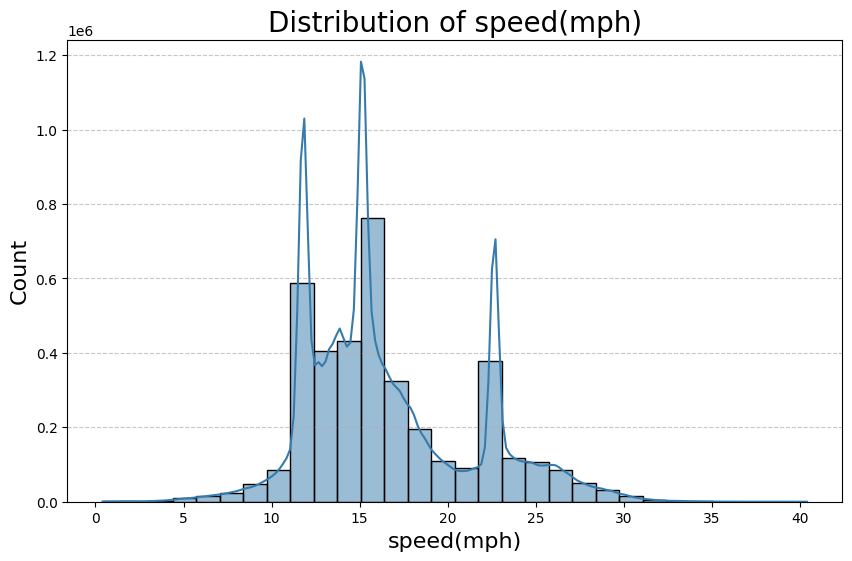

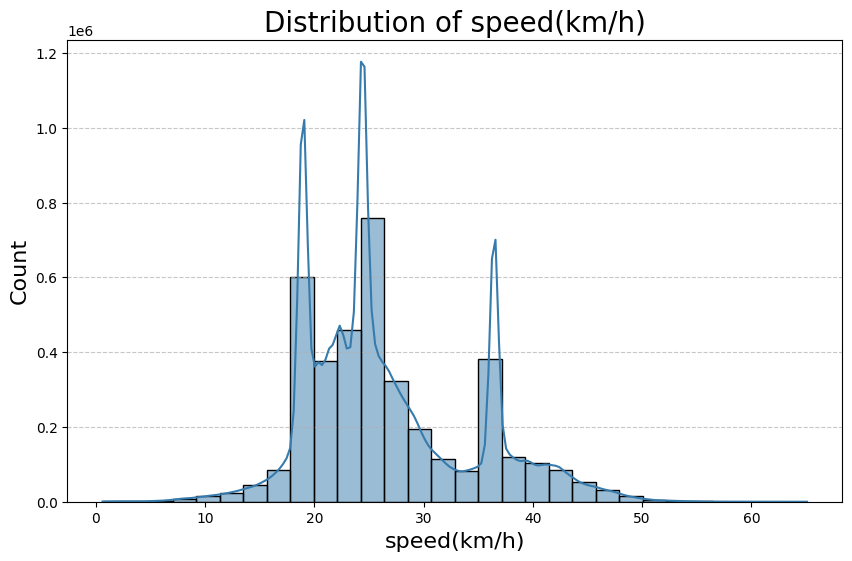

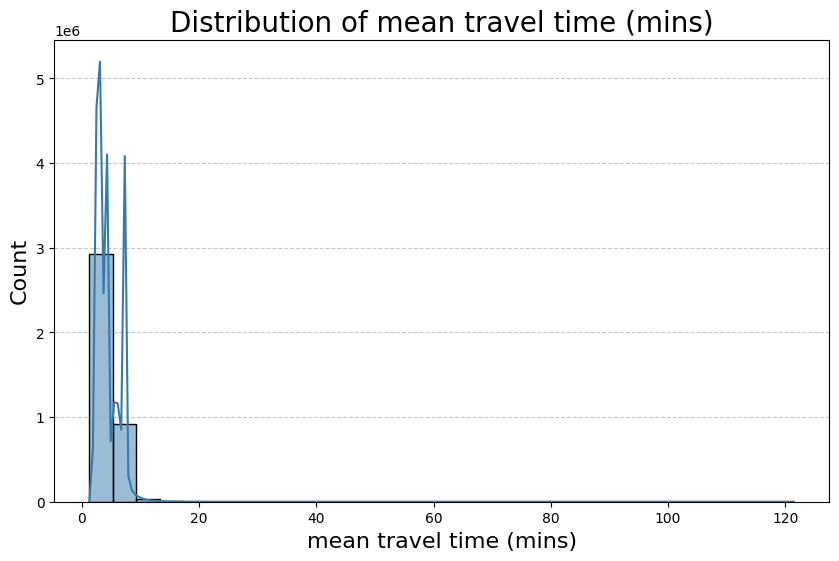

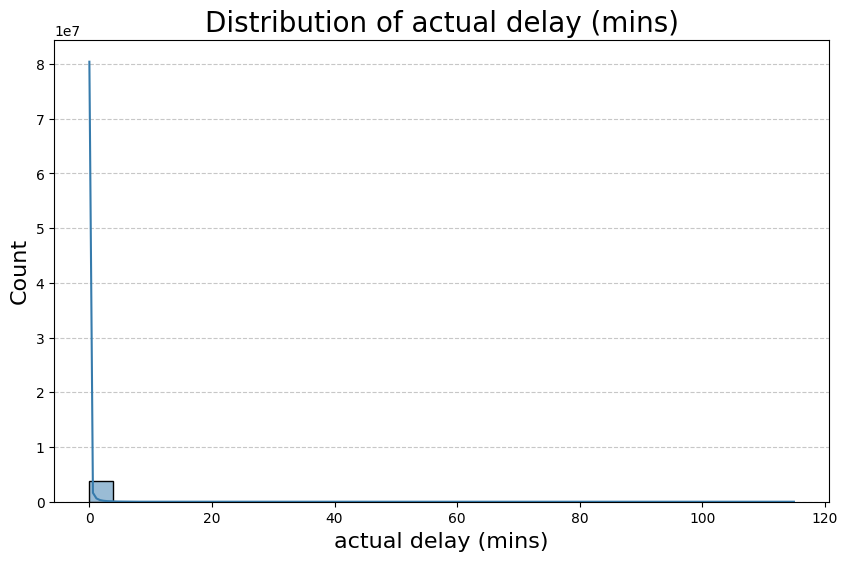

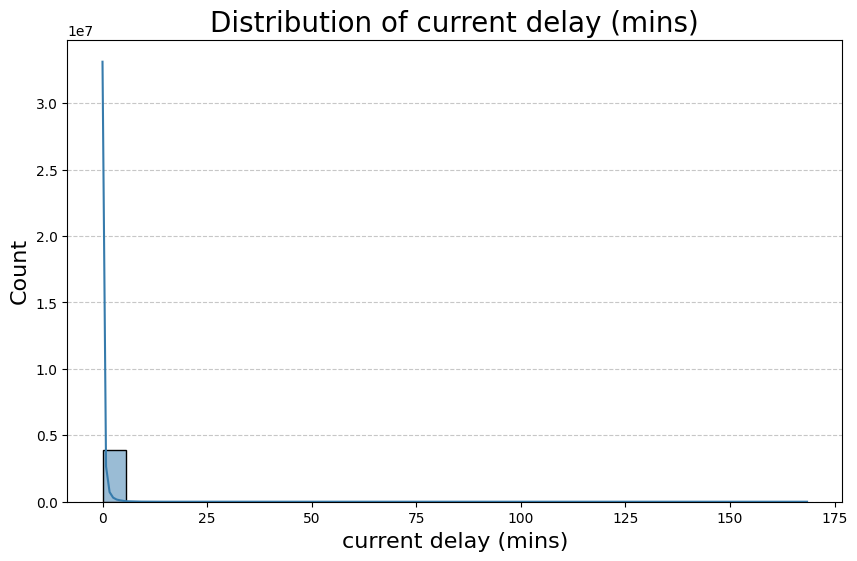

In [22]:
# Step 1: Histograms for numerical columns
blue_color = sns.color_palette("Blues_d")[3]

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(all_routes_df[col], kde=True, bins=30, color=blue_color)
    plt.title(f'Distribution of {col}', fontsize=20)
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


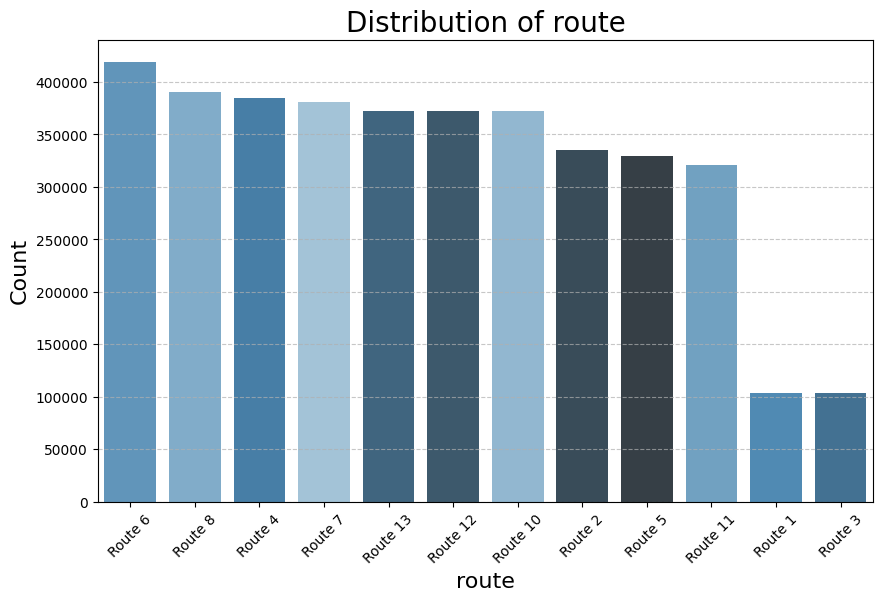

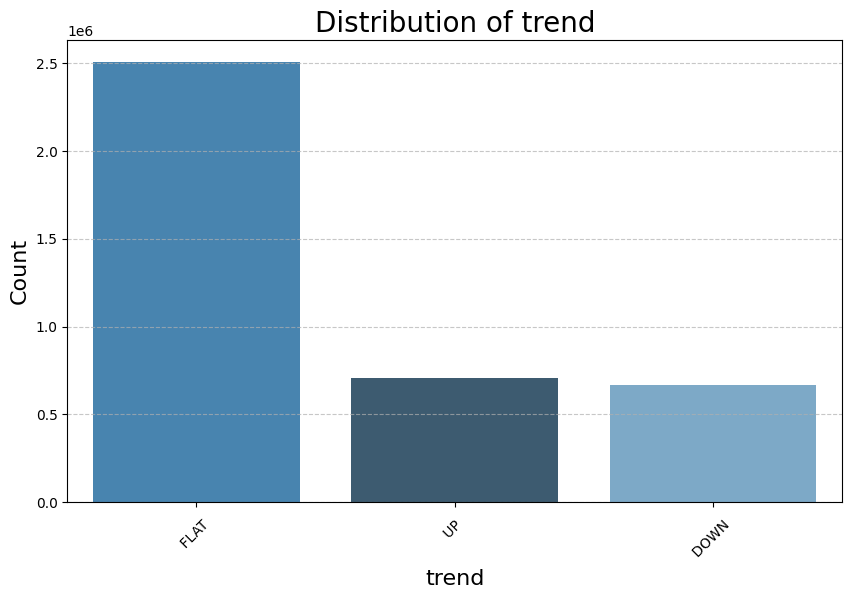

In [23]:
# Step 2: Distribution plots for categorical columns

for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(
        data=all_routes_df,
        x=col,
        hue=col,
        order=all_routes_df[col].value_counts().index,
        palette="Blues_d",
        legend=False
    )
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}', fontsize=20)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

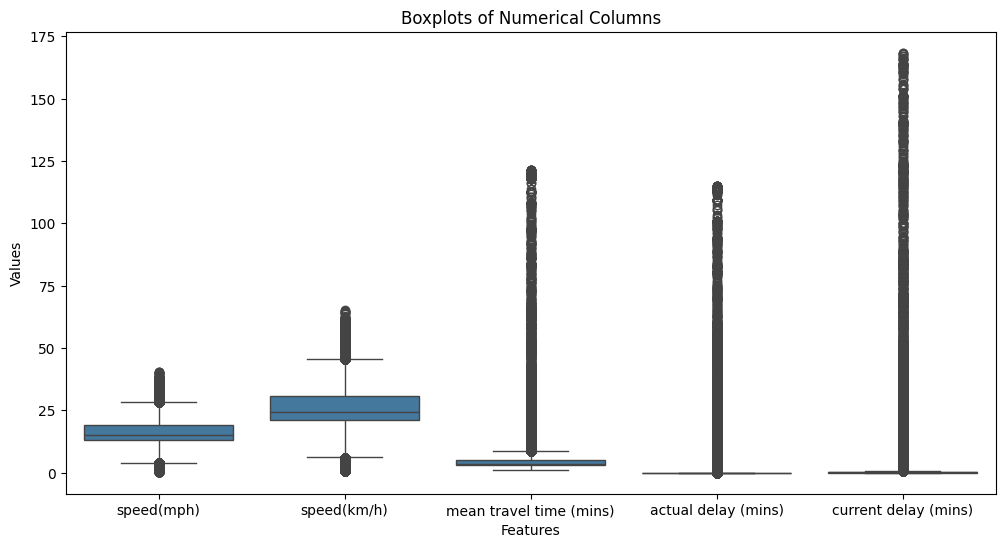

In [24]:
# Step 4: Boxplots for numerical features

plt.figure(figsize=(12, 6))
sns.boxplot(data=all_routes_df[numerical_cols], palette=[blue_color]*len(numerical_cols))
plt.title("Boxplots of Numerical Columns")
plt.ylabel("Values")
plt.xlabel("Features")
plt.show()

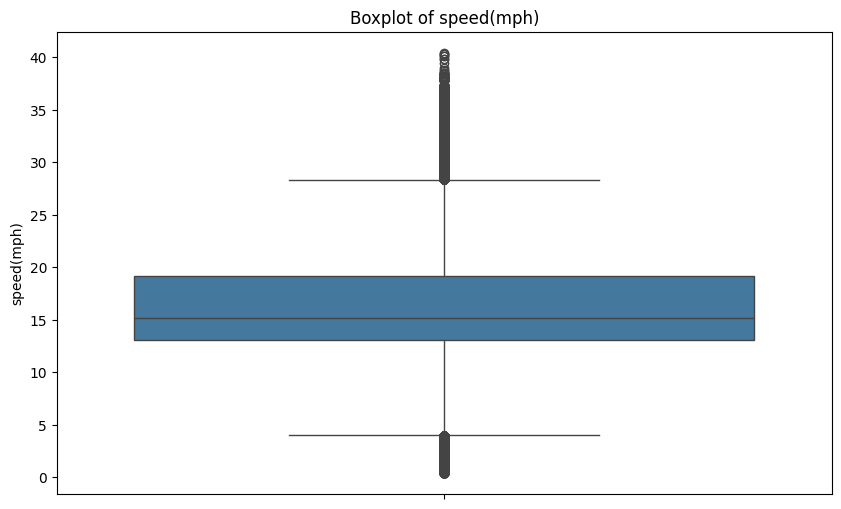

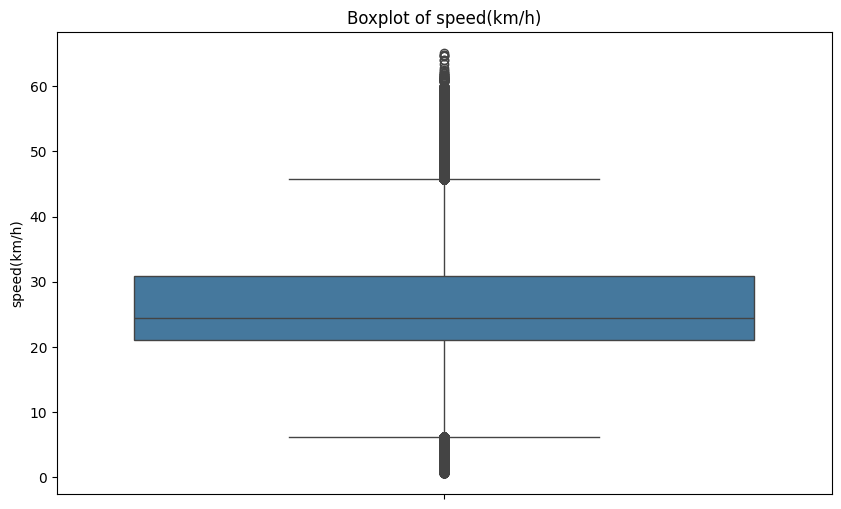

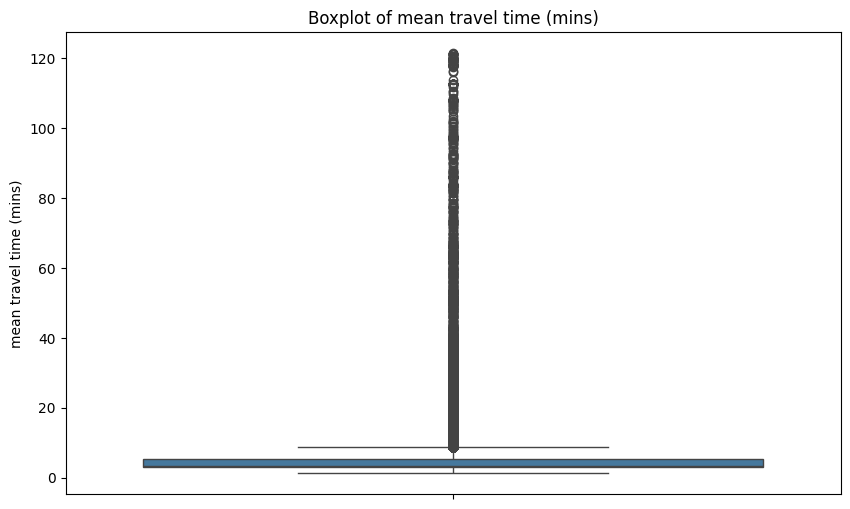

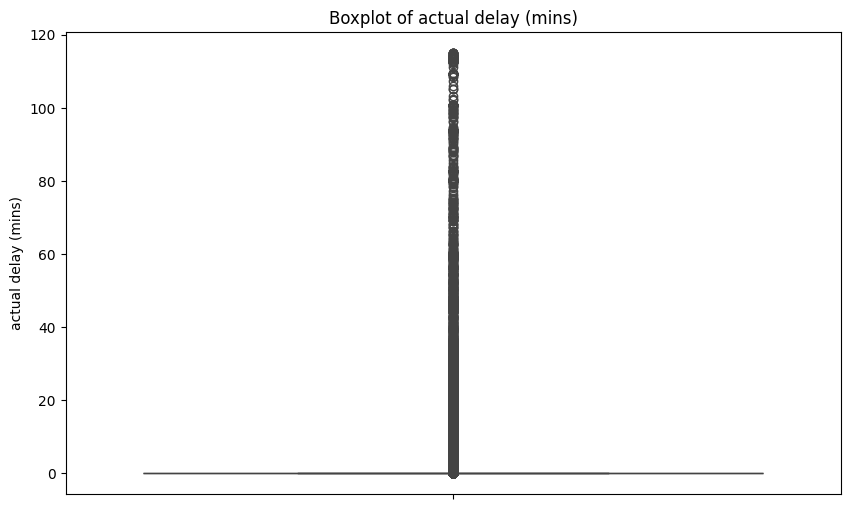

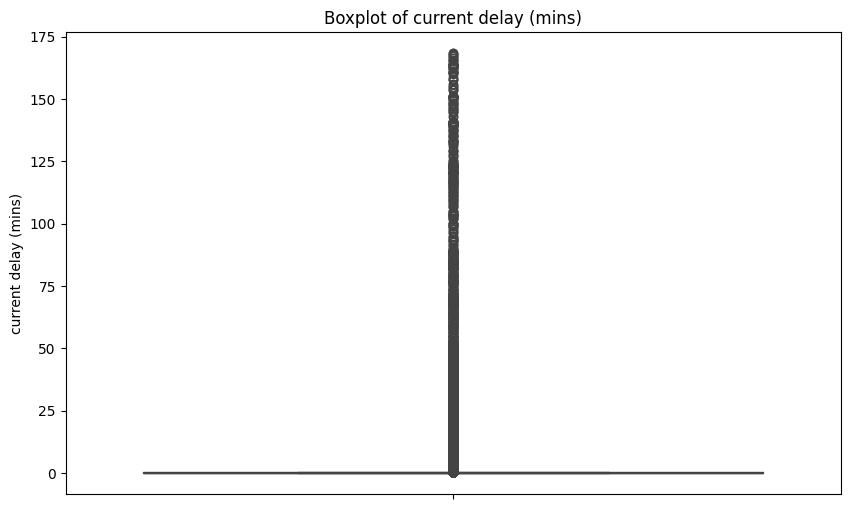

In [25]:
# Step 4i: Separate boxplots

for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(y=all_routes_df[col], color=blue_color)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

## Block 5: Feature Relationships

This step will explore relationships between key features in our dataset to better understand how different variables interact. 

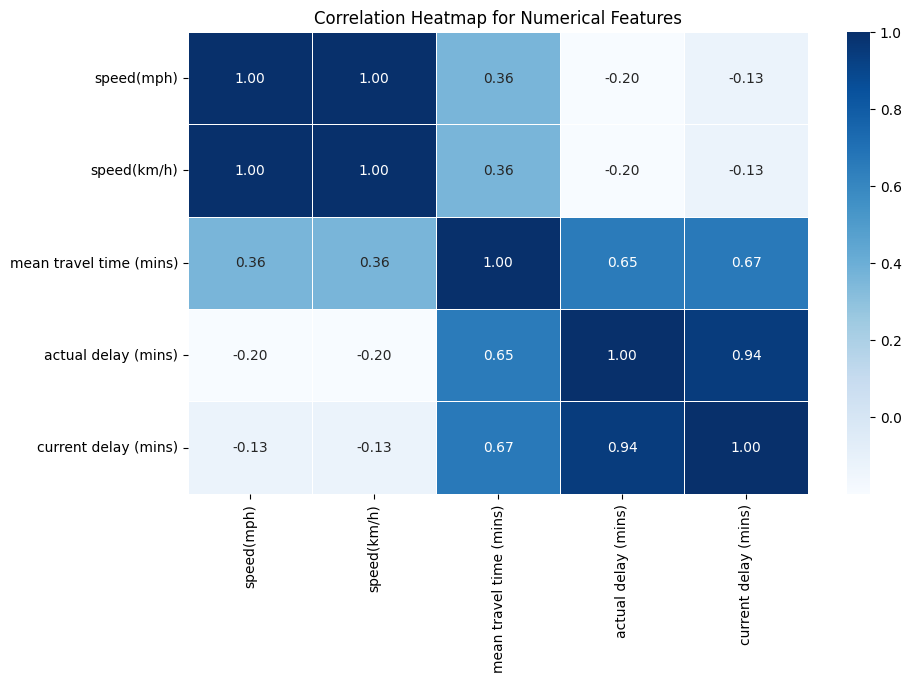

In [47]:
# Step 1: Correlation analysis for numerical features

corr_matrix = all_routes_df[numerical_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

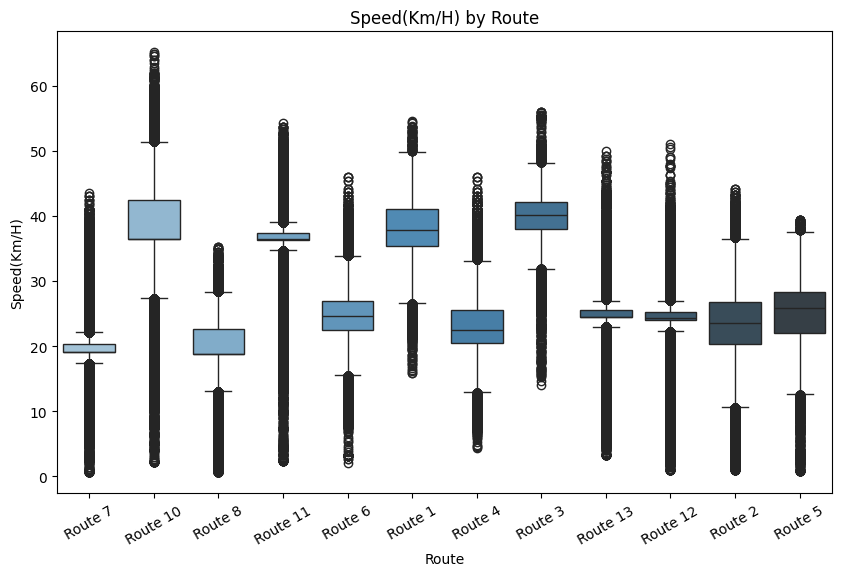

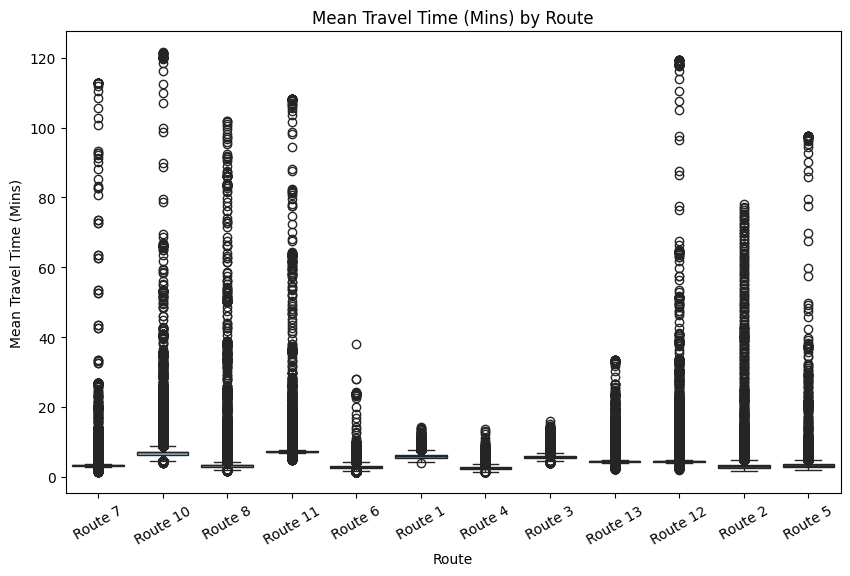

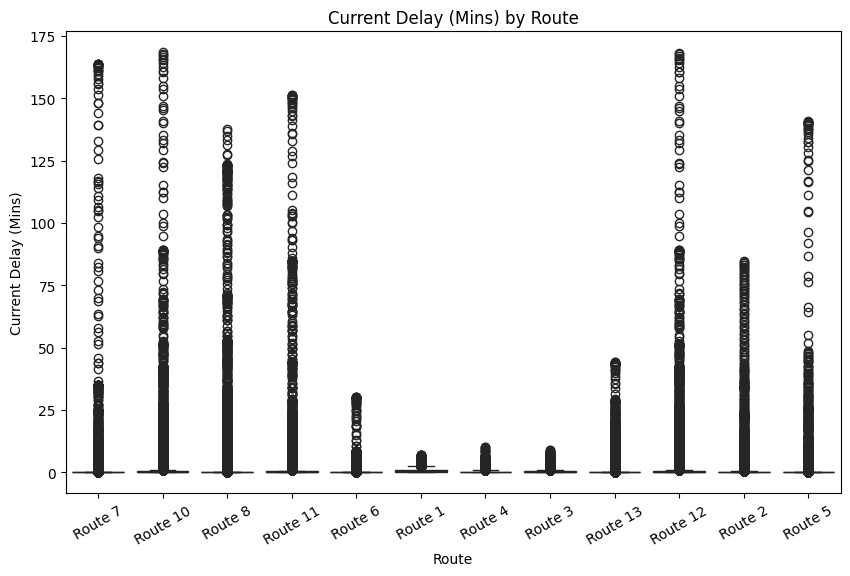

In [49]:
# Step 2: Relationship between route and numerical columns

cols_to_analyze = ['speed(km/h)', 'mean travel time (mins)', 'current delay (mins)']

for col in cols_to_analyze:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='route', y=col, data=all_routes_df, palette='Blues_d', hue='route')
    plt.title(f'{col.title()} by Route')
    plt.xlabel('Route')
    plt.ylabel(col.title())
    plt.xticks(rotation=30)
    plt.show()

In [50]:
# Step 4: Averages by route, sorted by actual delay

route_summary = (
    all_routes_df.groupby('route')[cols_to_analyze]
    .mean()
    .round(2)
    .sort_values('current delay (mins)')    
)
display(route_summary)

,speed(km/h),mean travel time (mins),current delay (mins)
route,,,
Route 5,25.42,3.18,0.13
Route 6,24.79,2.93,0.15
Route 4,23.14,2.63,0.25
Route 2,23.62,3.15,0.30
Route 3,39.96,5.63,0.32
Route 7,19.77,3.35,0.32
Route 8,20.02,3.28,0.34
Route 13,24.90,4.46,0.44
Route 11,36.54,7.34,0.59


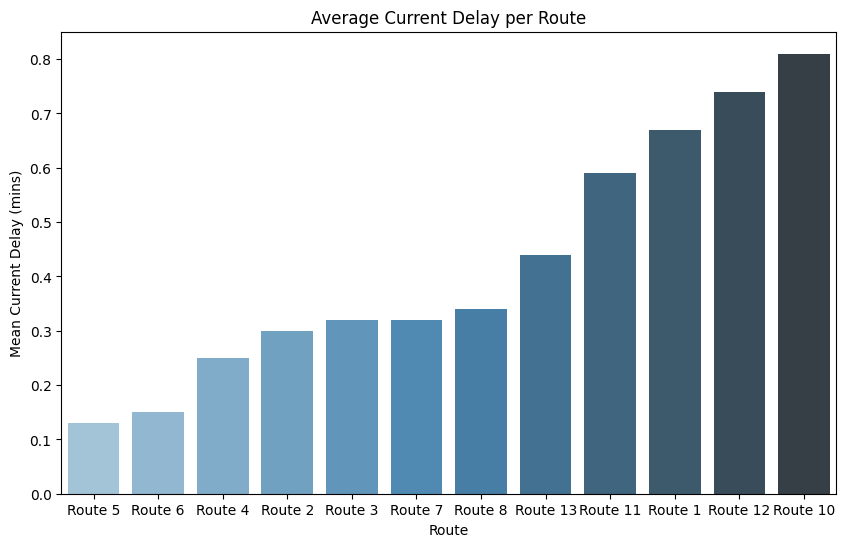

In [51]:
# Visualize average delay per route
plt.figure(figsize=(10,6))
sns.barplot(x=route_summary.index, y=route_summary['current delay (mins)'], palette='Blues_d', hue=route_summary.index)
plt.title('Average Current Delay per Route')
plt.xlabel('Route')
plt.ylabel('Mean Current Delay (mins)')
plt.show()

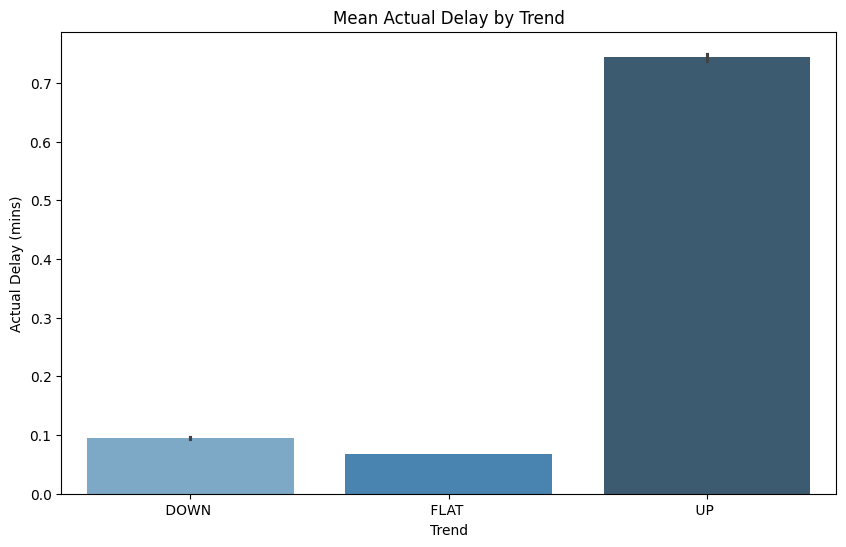

In [30]:
# Step 5: Trend vs delay

plt.figure(figsize=(10,6))
sns.barplot(x='trend', y='actual delay (mins)', data=all_routes_df, palette='Blues_d', hue='trend', estimator='mean')
plt.title('Mean Actual Delay by Trend')
plt.xlabel('Trend')
plt.ylabel('Actual Delay (mins)')
plt.show()

In [31]:
# Step 6: Month vs Route counts

# Extract year and month
all_routes_df['year_month'] = all_routes_df['calculation time'].dt.to_period('M')

# Count number of observations per route per month
route_month_counts = pd.crosstab(all_routes_df['route'], all_routes_df['year_month'])

# Sort by route number
route_month_counts = route_month_counts.reindex(
    sorted(route_month_counts.index, key=lambda x: int(''.join(filter(str.isdigit, x))))
)

route_month_counts

year_month,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09
route,,,,,,,,,,,
Route 1,120,44640,44580,14397,0,0,0,0,0,0,0
Route 2,120,44640,40863,37098,43185,40822,39756,43185,43333,2012,13
Route 3,120,44640,44580,14397,0,0,0,0,0,0,0
Route 4,120,44640,40863,37098,43185,40822,39756,43185,43333,42751,9171
Route 5,0,41979,44270,37463,35395,38829,35405,32049,25408,30031,8232
Route 6,0,41978,44390,74561,78580,48716,35405,32049,25408,30030,8235
Route 7,120,44408,44483,37687,41635,43026,39605,43073,44091,42909,0
Route 8,120,44408,44483,37687,41635,43026,39605,43073,44091,42909,9209
Route 10,120,44640,43738,37761,44078,41011,30436,43126,35824,42089,9215


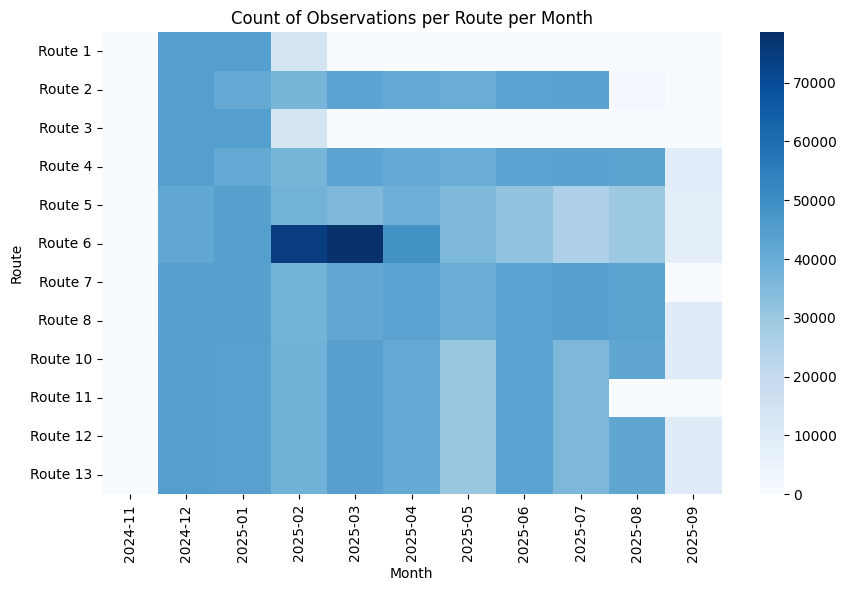

In [32]:
# Step 6a: Visualize observations per route per month using a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(route_month_counts, annot=False, cmap='Blues')
plt.title('Count of Observations per Route per Month')
plt.xlabel('Month')
plt.ylabel('Route')
plt.show()

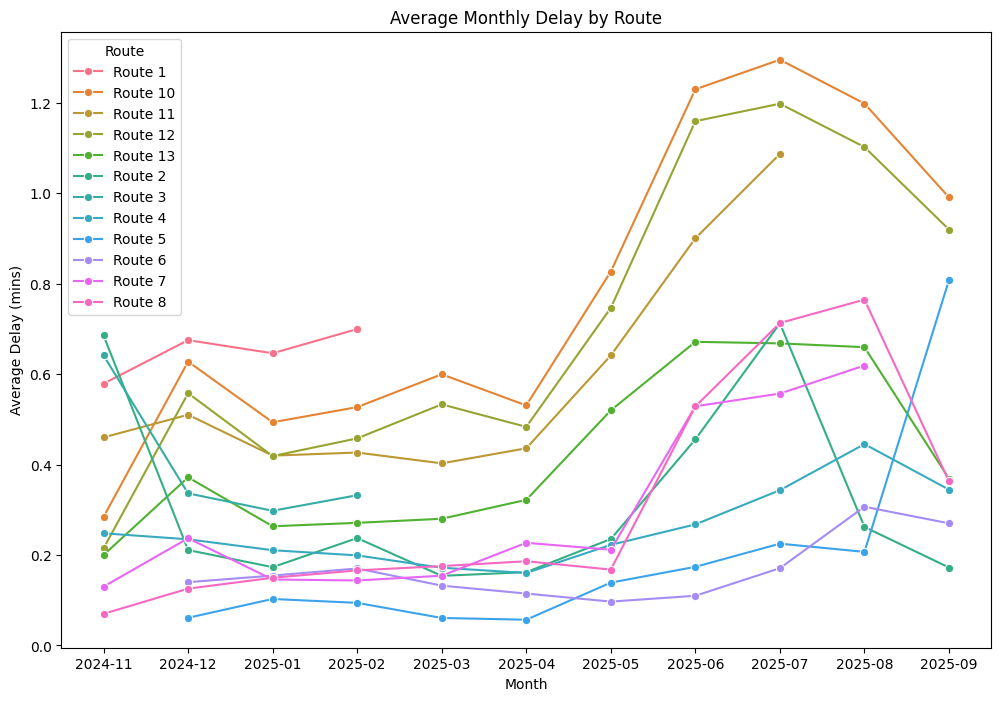

In [33]:
# Average monthly delay by route

# Extract year-month
all_routes_df['year_month'] = all_routes_df['calculation time'].dt.to_period('M')

# Compute average delay per route per month
avg_delay = all_routes_df.groupby(['route','year_month'])['current delay (mins)'].mean().reset_index()

# Convert year_month to string for plotting
avg_delay['year_month_str'] = avg_delay['year_month'].astype(str)


plt.figure(figsize=(12,8))
sns.lineplot(
    data=avg_delay,
    x='year_month_str',
    y='current delay (mins)',
    hue='route',
    marker='o'
)

plt.title('Average Monthly Delay by Route')
plt.xlabel('Month')
plt.ylabel('Average Delay (mins)') 
plt.legend(title='Route')
plt.show()


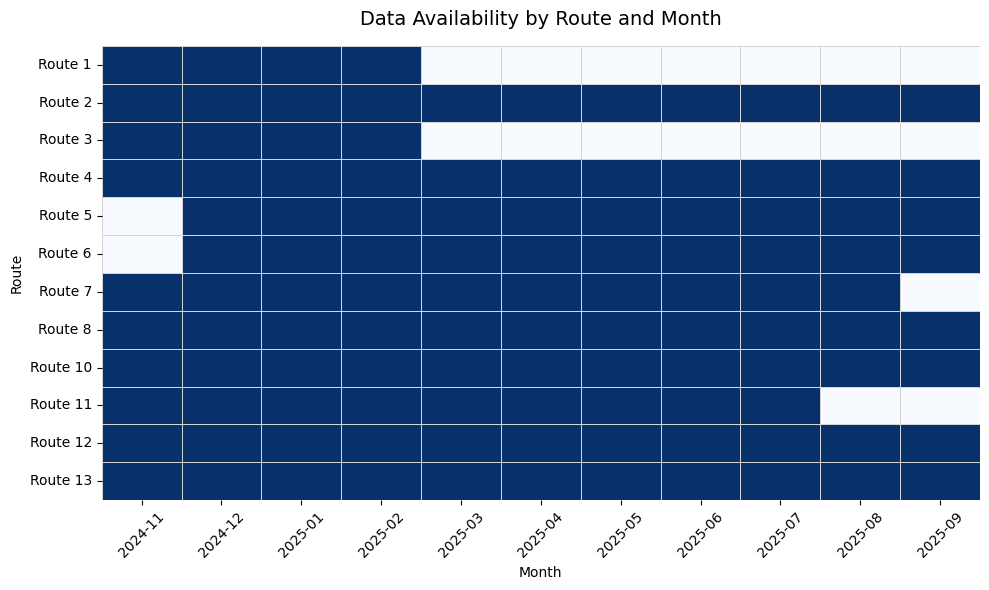

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert your route_month_counts into a boolean mask
presence = route_month_counts > 0   # True where data exists
presence = presence.astype(int)     # Convert True/False → 1/0

plt.figure(figsize=(10, 6))
sns.heatmap(
    presence,
    cmap='Blues',        # Green where data exists
    cbar=False,           # No color bar (since it's just yes/no)
    linewidths=0.5,
    linecolor='lightgray'
)
plt.title('Data Availability by Route and Month', fontsize=14, pad=15)
plt.xlabel('Month')
plt.ylabel('Route')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/colorbar.py:1237: RuntimeWarning: invalid value encountered in subtract
  y = (self._boundaries - self._boundaries[self._inside][0])
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/colorbar.py:1238: RuntimeWarning: invalid value encountered in divide
  y = y / (self._boundaries[self._inside][-1] -


ValueError: Axis limits cannot be NaN or Inf

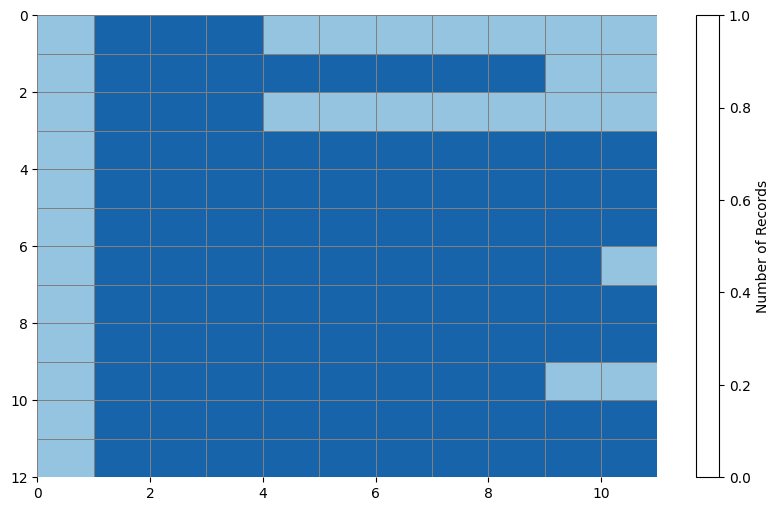

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define bins and labels
bins = [-float('inf'), 0, 5000, route_month_counts.values.max()]
labels = ['< 0', '0–5k', '5k+']

# Create discrete blue colormap
cmap = sns.color_palette("Blues", len(bins))
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=len(bins))

plt.figure(figsize=(10, 6))
sns.heatmap(
    route_month_counts,
    cmap=cmap,
    norm=norm,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Number of Records'}
)
plt.title('Data Volume per Route per Month', fontsize=14, pad=15)
plt.xlabel('Month')
plt.ylabel('Route')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Make colorbar show readable bin labels
colorbar = plt.gca().collections[0].colorbar
colorbar.set_ticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)])
colorbar.set_ticklabels(labels)

plt.show()


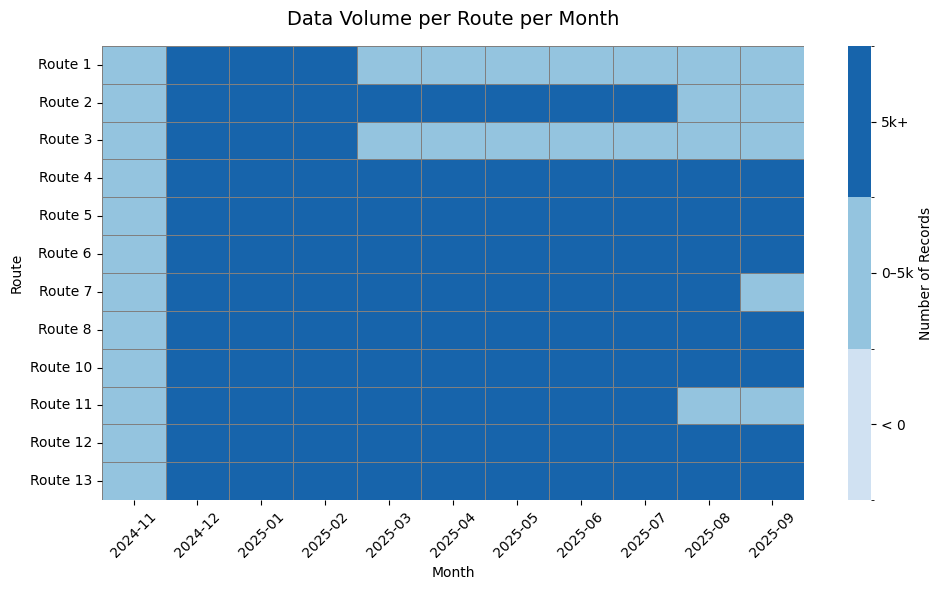

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Replace missing values in your data if needed
route_month_counts = route_month_counts.fillna(0)

# Define safe bins and labels
bins = [route_month_counts.values.min() - 1, 0, 5000, route_month_counts.values.max()]
labels = ['< 0', '0–5k', '5k+']

# Create discrete "Blues" colormap
cmap = sns.color_palette("Blues", len(bins))
norm = mcolors.BoundaryNorm(boundaries=bins, ncolors=len(bins))

plt.figure(figsize=(10, 6))
sns.heatmap(
    route_month_counts,
    cmap=cmap,
    norm=norm,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Number of Records'}
)
plt.title('Data Volume per Route per Month', fontsize=14, pad=15)
plt.xlabel('Month')
plt.ylabel('Route')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Add readable colorbar labels
colorbar = plt.gca().collections[0].colorbar
colorbar.set_ticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)])
colorbar.set_ticklabels(labels)

plt.show()
